**Корректность проверена на Python 3.6:**
+ pandas 0.23.4
+ numpy 1.15.4
+ matplotlib 3.0.2
+ sklearn 0.20.2

# Sklearn

# Визуализация данных

In [1]:
from sklearn import datasets

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Загрузка выборки

In [3]:
digits  =  datasets.load_digits()

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
print('target:', digits.target[0])
print('features: \n', digits.data[0]) 
print('number of features:', len(digits.data[0]))

target: 0
features: 
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
number of features: 64


## Визуализация объектов выборки

TypeError: Invalid shape (64,) for image data

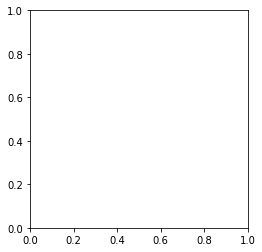

In [6]:
#не будет работать: Invalid dimensions for image data
pylab.imshow(digits.data[0])

In [7]:
digits.data[0].shape

(64,)

In [17]:
print(digits.data[0].reshape(8,8))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [18]:
digits.data[0].reshape(8,8).shape

(8, 8)

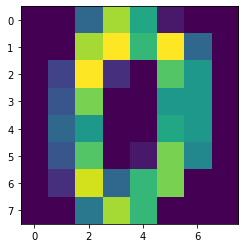

In [19]:
pylab.imshow(digits.data[0].reshape(8,8))

In [20]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [21]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


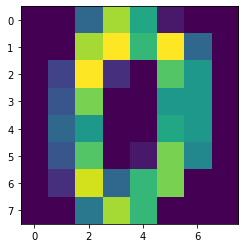

In [22]:
pylab.imshow(digits.images[0])

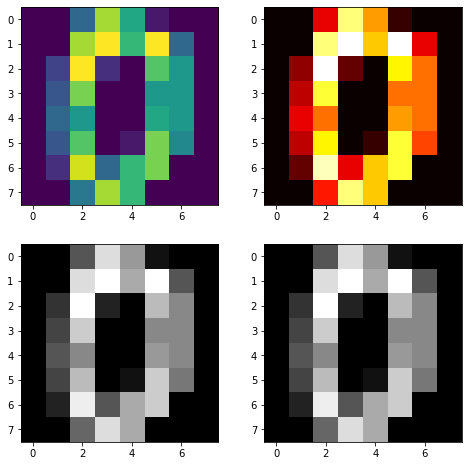

In [23]:
pyplot.figure(figsize(8, 8))

pyplot.subplot(2, 2, 1)
pylab.imshow(digits.images[0])

pyplot.subplot(2, 2, 2)
pylab.imshow(digits.images[0], cmap = 'hot')

pyplot.subplot(2, 2, 3)
pylab.imshow(digits.images[0], cmap = 'gray')

pyplot.subplot(2, 2, 4)
pylab.imshow(digits.images[0], cmap = 'gray', interpolation = 'nearest')

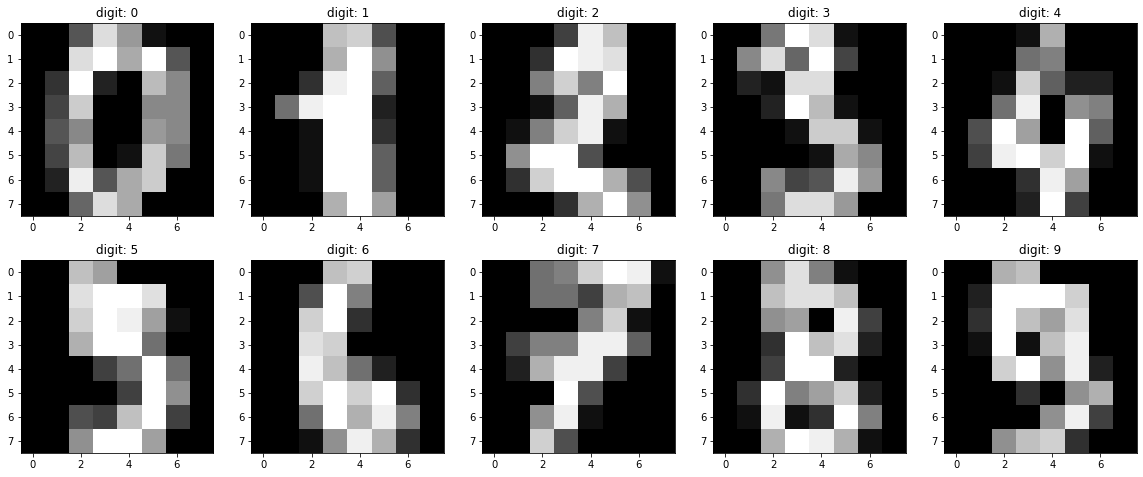

In [24]:
pyplot.figure(figsize(20, 8))

for plot_number, plot in enumerate(digits.images[:10]):
    pyplot.subplot(2, 5, plot_number + 1)
    pylab.imshow(plot, cmap = 'gray')
    pylab.title('digit: ' + str(digits.target[plot_number]))

## Уменьшение размерности

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from collections import  Counter

In [26]:
data = digits.data[:1000]
labels = digits.target[:1000]

In [27]:
print(Counter(labels))

Counter({3: 104, 1: 102, 6: 101, 2: 100, 5: 100, 0: 99, 7: 99, 9: 99, 4: 98, 8: 98})


<BarContainer object of 10 artists>

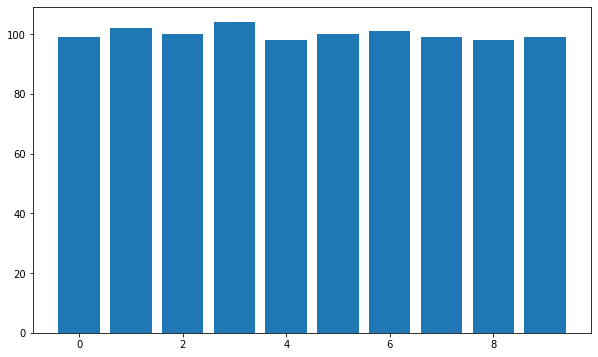

In [28]:
pylab.figure(figsize = (10, 6))
pylab.bar(Counter(labels).keys(), Counter(labels).values())

In [29]:
classifier = KNeighborsClassifier()

In [30]:
classifier.fit(data, labels)

KNeighborsClassifier()

In [31]:
print(classification_report(classifier.predict(data), labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      0.97      0.99       105
           2       1.00      1.00      1.00       100
           3       1.00      0.98      0.99       106
           4       1.00      1.00      1.00        98
           5       0.99      1.00      0.99        99
           6       1.00      1.00      1.00       101
           7       0.99      0.99      0.99        99
           8       0.97      0.99      0.98        96
           9       0.96      0.98      0.97        97

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



### Random projection

In [32]:
from sklearn import random_projection

In [33]:
projection = random_projection.SparseRandomProjection(n_components = 2, random_state = 0)
data_2d_rp = projection.fit_transform(data)

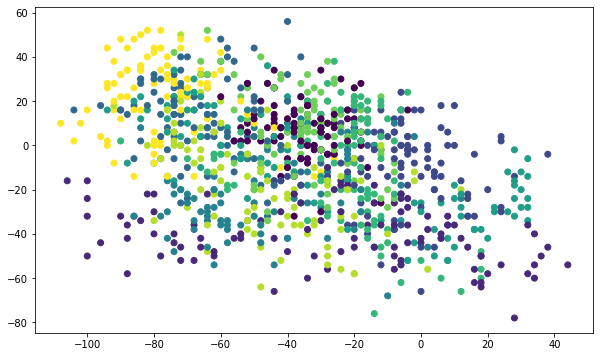

In [34]:
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_rp[:, 0], data_2d_rp[:, 1], c = labels)

In [35]:
classifier.fit(data_2d_rp, labels)
print(classification_report(classifier.predict(data_2d_rp), labels))

              precision    recall  f1-score   support

           0       0.77      0.48      0.59       159
           1       0.75      0.56      0.64       137
           2       0.70      0.60      0.65       116
           3       0.71      0.52      0.60       143
           4       0.40      0.57      0.47        69
           5       0.40      0.56      0.47        72
           6       0.48      0.57      0.52        84
           7       0.38      0.55      0.45        69
           8       0.35      0.60      0.44        57
           9       0.66      0.69      0.67        94

    accuracy                           0.56      1000
   macro avg       0.56      0.57      0.55      1000
weighted avg       0.61      0.56      0.57      1000



### PCA

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA(n_components = 2, random_state = 0)
data_2d_pca = pca.fit_transform(data)

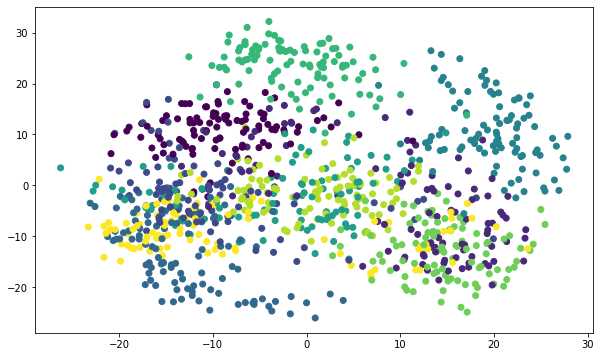

In [38]:
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c = labels)

In [39]:
classifier.fit(data_2d_pca, labels)
print(classification_report(classifier.predict(data_2d_pca), labels))

              precision    recall  f1-score   support

           0       0.83      0.73      0.77       113
           1       0.56      0.54      0.55       105
           2       0.59      0.57      0.58       104
           3       0.77      0.79      0.78       101
           4       0.95      0.93      0.94       100
           5       0.56      0.54      0.55       104
           6       0.92      0.93      0.93       100
           7       0.76      0.71      0.74       105
           8       0.62      0.66      0.64        92
           9       0.52      0.67      0.58        76

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000



### MDS

In [40]:
from sklearn import manifold

In [41]:
mds = manifold.MDS(n_components = 2, n_init = 1, max_iter = 100)
data_2d_mds = mds.fit_transform(data)

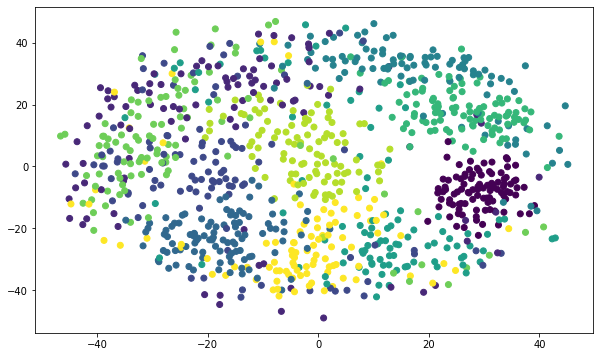

In [42]:
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_mds[:, 0], data_2d_mds[:, 1], c = labels)

In [43]:
classifier.fit(data_2d_mds, labels)
print(classification_report(classifier.predict(data_2d_mds), labels))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       111
           1       0.67      0.57      0.62       119
           2       0.60      0.71      0.65        85
           3       0.85      0.79      0.81       112
           4       0.73      0.78      0.76        92
           5       0.67      0.69      0.68        97
           6       0.89      0.83      0.86       109
           7       0.57      0.64      0.60        88
           8       0.86      0.79      0.82       106
           9       0.61      0.74      0.67        81

    accuracy                           0.74      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.75      0.74      0.75      1000



### t- SNE

In [44]:
tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
data_2d_tsne = tsne.fit_transform(data)

/home/siarhei/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/siarhei/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


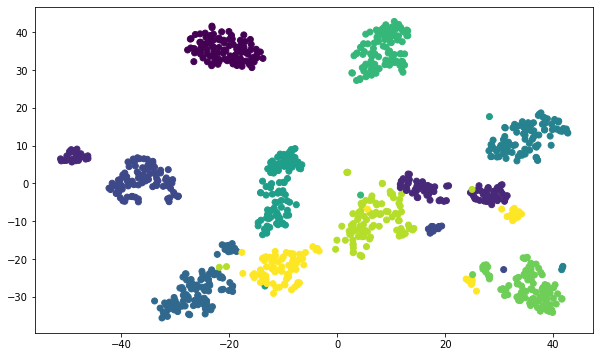

In [45]:
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c = labels)

In [46]:
classifier.fit(data_2d_tsne, labels)
print(classification_report(classifier.predict(data_2d_tsne), labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      0.99      1.00       103
           2       0.99      1.00      0.99        99
           3       1.00      0.97      0.99       107
           4       1.00      0.99      0.99        99
           5       0.98      1.00      0.99        98
           6       0.99      1.00      1.00       100
           7       0.99      0.99      0.99        99
           8       0.97      0.98      0.97        97
           9       0.98      0.98      0.98        99

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

